# Unit 4 - Noisy data
---
1. [Histograms](#section1)
2. [Standard deviation](#section2)
3. [Boxplots](#section3)


In [4]:
import pandas as pd
import numpy as np

<a id='section1'></a>

### 1. Histograms

#### Gym example

Taken from: https://data36.com/plot-histogram-python-pandas/

In [5]:
mu = 168 #mean
sigma = 5 #stddev
sample = 250
np.random.seed(0)
height_f = np.random.normal(mu, sigma, sample).astype(int)

In [6]:
mu = 176 #mean
sigma = 6 #stddev
sample = 250
np.random.seed(1)
height_m = np.random.normal(mu, sigma, sample).astype(int)

In [7]:
gym = pd.DataFrame({'height_f': height_f, 'height_m': height_m})
gym.head(7)

height_f  height_m
0       176       185
1       170       172
2       172       172
3       179       169
4       177       181
5       163       162
6       172       186

To begin with - why a histogram?

This is what happens if we just plot lines:

<AxesSubplot:>

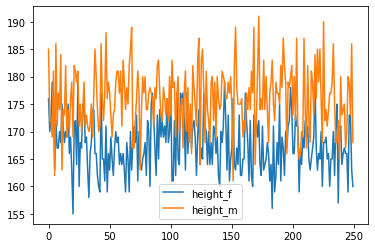

In [8]:
gym.plot()

Ummm.. it's very messy. 

#### Different histograms:

array([[<AxesSubplot:title={'center':'height_f'}>]], dtype=object)

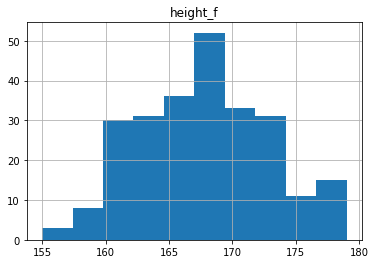

In [6]:
gym.hist('height_f')

array([[<AxesSubplot:title={'center':'height_f'}>,
        <AxesSubplot:title={'center':'height_m'}>]], dtype=object)

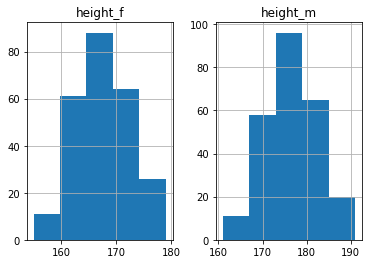

In [7]:
gym.hist(bins=5)

<AxesSubplot:ylabel='Frequency'>

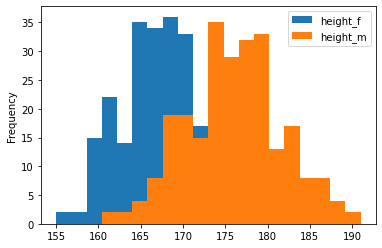

In [9]:
gym.plot.hist(bins=20)

<AxesSubplot:ylabel='Frequency'>

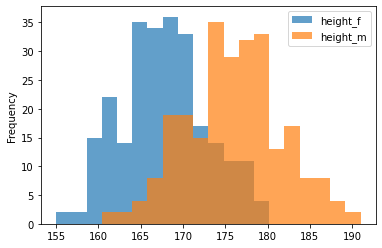

In [10]:
gym.plot.hist(bins=20, alpha=0.7)

---
#### Back to our vaccinations data:

In [11]:
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv'
vacc_df = pd.read_csv(url) 
vacc_df.head(2)

location iso_code        date  total_vaccinations  people_vaccinated  \
0  Afghanistan      AFG  2021-02-22                 0.0                0.0   
1  Afghanistan      AFG  2021-02-23                 NaN                NaN   

   people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                      NaN                     NaN                 NaN   
1                      NaN                     NaN              1367.0   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                             0.0                            0.0   
1                             NaN                            NaN   

   people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  
0                                  NaN                             NaN  
1                                  NaN                            35.0

#### Look at data for different countries
#### Use `groupby()` to group according to location

#### Attempt #1 - what is wrong?

In [12]:
vacc_df.groupby('location')[['total_vaccinations','daily_vaccinations','people_fully_vaccinated','people_fully_vaccinated_per_hundred']].max()

total_vaccinations  daily_vaccinations  people_fully_vaccinated  \
location                                                                       
Afghanistan            120000.0              3000.0                      NaN   
Africa               13599819.0            338969.0                4522435.0   
Albania                267531.0             17346.0                    655.0   
Algeria                 75000.0              3748.0                      NaN   
Andorra                 17091.0               679.0                   1265.0   
...                         ...                 ...                      ...   
Venezuela              250000.0             15200.0                      NaN   
Vietnam                 58037.0              3709.0                      NaN   
Wales                 2116050.0             33151.0                 528199.0   
World               805800837.0          17701666.0              176182288.0   
Zimbabwe               234579.0             12831.0                  29304.0   

             people_fully_vaccinated_per_hundred  
location                                          
Afghanistan                                  NaN  
Africa                                      0.34  
Albania                                     0.02  
Algeria                                      NaN  
Andorra                                     1.64  
...                                          ...  
Venezuela                                    NaN  
Vietnam                                      NaN  
Wales                                      16.75  
World                                       2.26  
Zimbabwe                                    0.20  

[184 rows x 4 columns]

#### Attempt #2 

#### Is this better?

In [13]:
vacc_df.fillna('0').groupby('location')[['total_vaccinations','daily_vaccinations','people_fully_vaccinated','people_fully_vaccinated_per_hundred']].max()

total_vaccinations  daily_vaccinations  people_fully_vaccinated  \
location                                                                       
Afghanistan                 NaN                 NaN                      NaN   
Africa                      NaN                 NaN                      NaN   
Albania                     NaN                 NaN                      NaN   
Algeria                     NaN                 NaN                      NaN   
Andorra                     NaN                 NaN                      NaN   
...                         ...                 ...                      ...   
Venezuela                   NaN                 NaN                      NaN   
Vietnam                     NaN                 NaN                      NaN   
Wales                       NaN                 NaN                      NaN   
World                       NaN                 NaN                      NaN   
Zimbabwe                    NaN                 NaN                      NaN   

             people_fully_vaccinated_per_hundred  
location                                          
Afghanistan                                  NaN  
Africa                                       NaN  
Albania                                      NaN  
Algeria                                      NaN  
Andorra                                      NaN  
...                                          ...  
Venezuela                                    NaN  
Vietnam                                      NaN  
Wales                                        NaN  
World                                        NaN  
Zimbabwe                                     NaN  

[184 rows x 4 columns]

#### Attempt #3 - change the 0 from string to int, and finally, it works :-)

In [14]:
vacc_df.fillna(0).groupby('location')[['total_vaccinations','daily_vaccinations','people_fully_vaccinated','people_fully_vaccinated_per_hundred']].max()

total_vaccinations  daily_vaccinations  people_fully_vaccinated  \
location                                                                       
Afghanistan            120000.0              3000.0                      0.0   
Africa               13599819.0            338969.0                4522435.0   
Albania                267531.0             17346.0                    655.0   
Algeria                 75000.0              3748.0                      0.0   
Andorra                 17091.0               679.0                   1265.0   
...                         ...                 ...                      ...   
Venezuela              250000.0             15200.0                      0.0   
Vietnam                 58037.0              3709.0                      0.0   
Wales                 2116050.0             33151.0                 528199.0   
World               805800837.0          17701666.0              176182288.0   
Zimbabwe               234579.0             12831.0                  29304.0   

             people_fully_vaccinated_per_hundred  
location                                          
Afghanistan                                 0.00  
Africa                                      0.34  
Albania                                     0.02  
Algeria                                     0.00  
Andorra                                     1.64  
...                                          ...  
Venezuela                                   0.00  
Vietnam                                     0.00  
Wales                                      16.75  
World                                       2.26  
Zimbabwe                                    0.20  

[184 rows x 4 columns]

#### The `world` row shouldn't be there. Remove it using `.drop()` and `.index() :

In [19]:
vacc_df.drop(vacc_df.loc[vacc_df.location == 'World'].index, inplace = True)

---
#### Your turn:
>What do you think `.index` does? Why is it there? How can you find out?
---

Before we continue, just assign this long row to a new dataframe, will be easier

In [16]:
grouped_df = vacc_df.fillna(0).groupby('location')[['total_vaccinations','daily_vaccinations','people_fully_vaccinated','people_fully_vaccinated_per_hundred']].max().copy()
grouped_df.tail()

total_vaccinations  daily_vaccinations  people_fully_vaccinated  \
location                                                                      
Uzbekistan            148642.0             17901.0                      0.0   
Venezuela             250000.0             15200.0                      0.0   
Vietnam                58037.0              3709.0                      0.0   
Wales                2116050.0             33151.0                 528199.0   
Zimbabwe              234579.0             12831.0                  29304.0   

            people_fully_vaccinated_per_hundred  
location                                         
Uzbekistan                                 0.00  
Venezuela                                  0.00  
Vietnam                                    0.00  
Wales                                     16.75  
Zimbabwe                                   0.20

#### sort the values using 'sort_values()`

In [ ]:
grouped_df.sort_values('people_fully_vaccinated_per_hundred', ascending = False).head(10)

#### Histogram according to all values:

In [ ]:
grouped_df.hist(bins=50)

#### Histogram according to people_fully_vaccinated_per_hundred

In [ ]:
grouped_df.hist('people_fully_vaccinated_per_hundred',bins=50)

#### Remove rows with 0's

Note that this is different than changing values to 0's

array([[<AxesSubplot:title={'center':'people_fully_vaccinated_per_hundred'}>]],
      dtype=object)

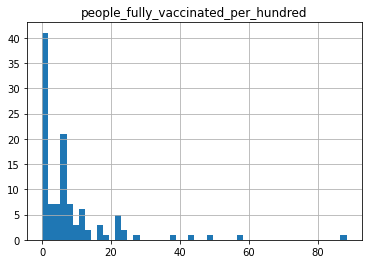

In [20]:
grouped_df.drop(grouped_df[grouped_df.people_fully_vaccinated_per_hundred == 0.0].index, inplace=True)
#grouped_df
grouped_df.hist('people_fully_vaccinated_per_hundred',bins=50)

---
>#### Your turn:
>
>Do the same, but for another column
---


---
>### Functions covered in this unit:
>
> `std()` - standard deviation
>
> `.hist(data, num_bins)` - the data and the number of bins 
>
> `.plot()` - simple line plot
>
> `.hist(data, num_bins, alpha)` - the data, the number of bins and the transparency (default is 10 bins, all data and not transparent)
>
> `.plot.hist()` - histograms on same chart
>
> `.drop()` - removes unwanted rows or columns
>
> `.index()` - index of the selected rows
>
> `sort_values()` - self explantory.. it just sorts values
>
---

### 2. Standard deviation

An small example showing that the more the data is spread, the higher the std:

In [ ]:
df = pd.DataFrame({'height' : [161, 156, 172], 
                   'weight': [67, 65, 89],
                   'age': [20,20,20]})
df

In [ ]:
df.mean()

In [ ]:
df.std()

<a id='section2'></a>

### 3. Boxplots

In [17]:
np.random.seed(2345)
df = pd.DataFrame(np.random.randn(20,4),
                  columns=['C1', 'C2', 'C3', 'C4'])
df.head()

C1        C2        C3        C4
0 -0.951299  1.768772 -1.141827  0.710755
1  0.510951  1.149029 -0.538460 -0.736645
2 -0.075996  0.848818  0.649783 -0.571212
3 -0.914158 -0.123520  0.281634  0.795612
4  0.179394  1.202007  0.371815 -0.290084

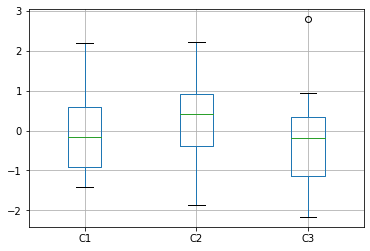

In [18]:
boxplot = df.boxplot(column=['C1', 'C2', 'C3'])

<AxesSubplot:>

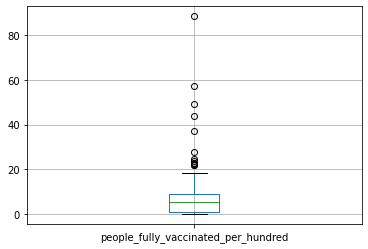

In [21]:
grouped_df.boxplot('people_fully_vaccinated_per_hundred')

In [22]:
grouped_df.sort_values('people_fully_vaccinated_per_hundred')


total_vaccinations  daily_vaccinations  \
location                                                   
Guatemala                   139490.0              5748.0   
Albania                     267531.0             17346.0   
Honduras                     57639.0              5352.0   
Paraguay                     48684.0              3830.0   
Oceania                    1270838.0             56089.0   
...                              ...                 ...   
Cayman Islands               56214.0              1024.0   
Seychelles                  108749.0              2401.0   
Falkland Islands              4322.0               189.0   
Israel                    10279751.0            184890.0   
Gibraltar                    64319.0              1068.0   

                  people_fully_vaccinated  people_fully_vaccinated_per_hundred  
location                                                                        
Guatemala                          1639.0                                 0.01  
Albania                             655.0                                 0.02  
Honduras                           2639.0                                 0.03  
Paraguay                           2684.0                                 0.04  
Oceania                           19273.0                                 0.05  
...                                   ...                                  ...  
Cayman Islands                    24553.0                                37.36  
Seychelles                        43259.0                                43.99  
Falkland Islands                   1717.0                                49.30  
Israel                          4950254.0                                57.19  
Gibraltar                         29790.0                                88.42  

[111 rows x 4 columns]

This doesn't seem to fit
https://ourworldindata.org/grapher/covid-vaccination-doses-per-capita

Is this an error???